In [21]:
import json

with open('non-iid.json', 'r') as f:
    loaded = json.load(f)
non_iid = loaded['weighted_loss']
non_iid_acc = loaded['weighted_acc']
non_iid_clients = loaded['accuracy']

with open('distributed.json', 'r') as f:
    loaded = json.load(f)
iid = loaded['weighted_loss']
iid_acc = loaded['weighted_acc']
iid_clients = loaded['accuracy']

with open('centralized.json', 'r') as f:
    loaded = json.load(f)
base = loaded['loss']
base_acc = loaded['accuracy']
iter = loaded['test_iter']

with open('vgg-iid.json', 'r') as f:
    loaded = json.load(f)
vgg_iid = loaded['weighted_loss']
vgg_iid_acc = loaded['weighted_acc']
vgg_iid_clients = loaded['accuracy']

with open('vgg-non-iid.json', 'r') as f:
    loaded = json.load(f)
vgg_non_iid = loaded['weighted_loss']
vgg_non_iid_acc = loaded['weighted_acc']
vgg_non_iid_clients = loaded['accuracy']

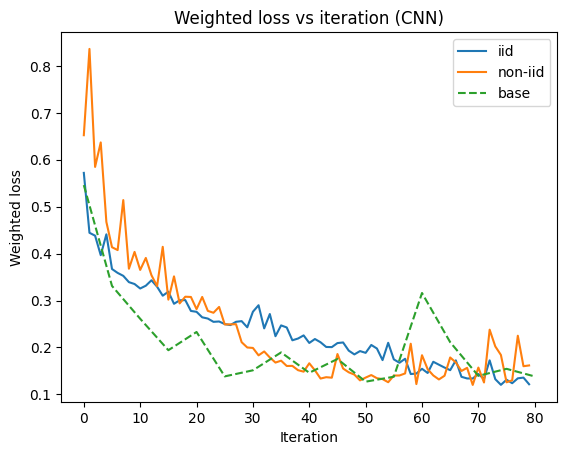

In [22]:
import matplotlib.pyplot as plt

plt.plot(iid, label='iid')
plt.plot(non_iid, label='non-iid')
plt.plot(iter, base, linestyle='--', label='base')
plt.title("Weighted loss vs iteration (CNN)")
plt.xlabel("Iteration")
plt.ylabel("Weighted loss")
plt.legend()
plt.show()

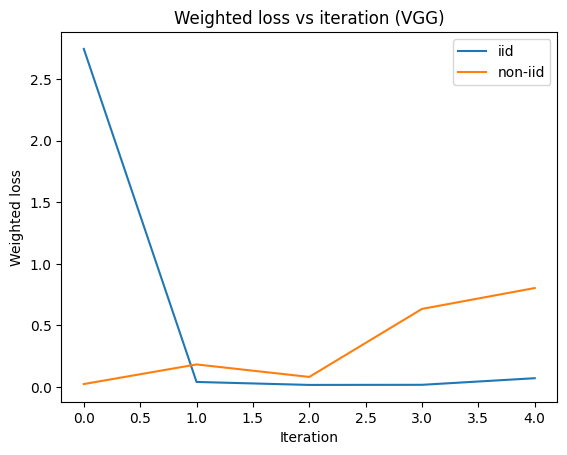

In [23]:
import matplotlib.pyplot as plt

plt.plot(vgg_iid, label='iid')
plt.plot(vgg_non_iid, label='non-iid')
plt.title("Weighted loss vs iteration (VGG)")
plt.xlabel("Iteration")
plt.ylabel("Weighted loss")
plt.legend()
plt.show()

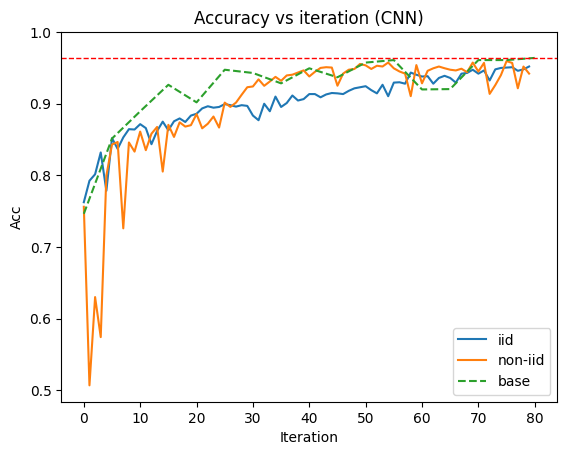

In [24]:
plt.plot(iid_acc, label='iid')
plt.plot(non_iid_acc, label='non-iid')
plt.plot(iter, base_acc, linestyle='--', label='base')
plt.axhline(y=0.964, color='r', linestyle='--', linewidth=1)
plt.ylim(top=1)
plt.title("Accuracy vs iteration (CNN)")
plt.xlabel("Iteration")
plt.ylabel("Acc")
plt.legend()
plt.show()

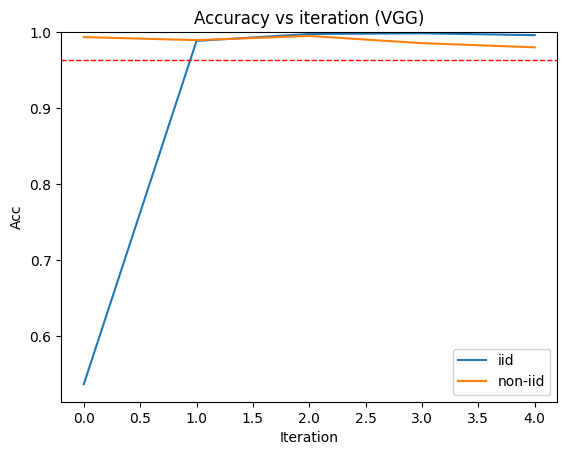

In [25]:
plt.plot(vgg_iid_acc, label='iid')
plt.plot(vgg_non_iid_acc, label='non-iid')
plt.axhline(y=0.964, color='r', linestyle='--', linewidth=1)
plt.ylim(top=1)
plt.title("Accuracy vs iteration (VGG)")
plt.xlabel("Iteration")
plt.ylabel("Acc")
plt.legend()
plt.show()

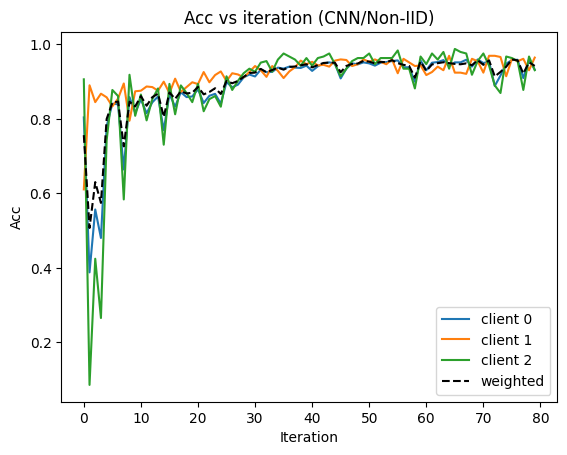

In [26]:
for i, client in enumerate(non_iid_clients):
    plt.plot(client, label='client ' + str(i))
plt.plot(non_iid_acc, linestyle='--', color='black', label='weighted')
plt.title("Acc vs iteration (CNN/Non-IID)")
plt.xlabel("Iteration")
plt.ylabel("Acc")
plt.legend()
plt.show()

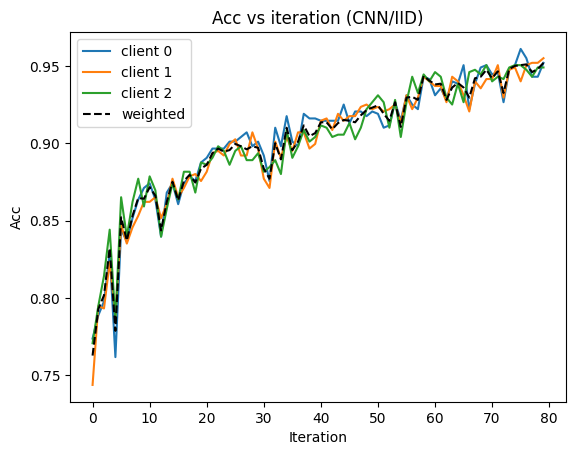

In [27]:
for i, client in enumerate(iid_clients):
    plt.plot(client, label='client ' + str(i))
plt.plot(iid_acc, linestyle='--', color='black', label='weighted')
plt.title("Acc vs iteration (CNN/IID)")
plt.xlabel("Iteration")
plt.ylabel("Acc")
plt.legend()
plt.show()

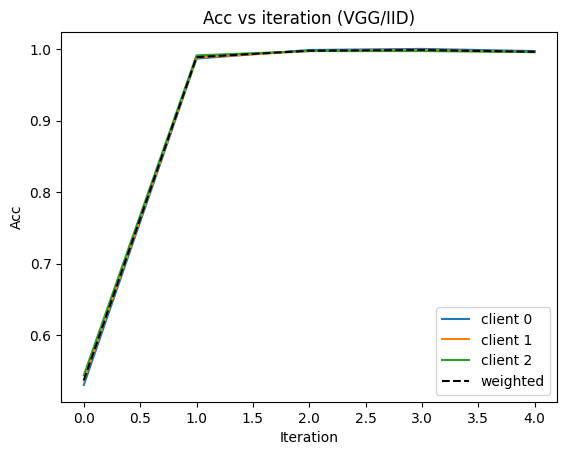

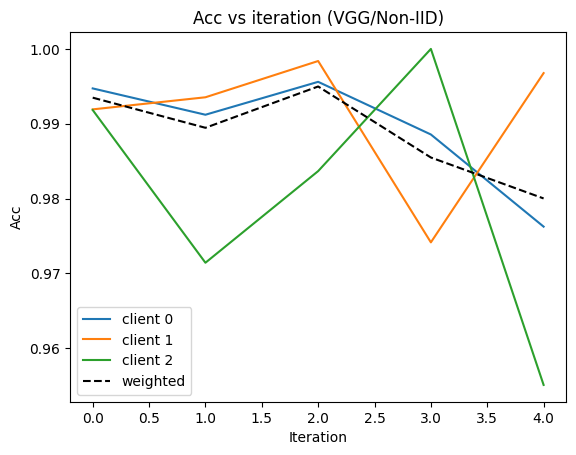

In [28]:
for i, client in enumerate(vgg_iid_clients):
    plt.plot(client, label='client ' + str(i))
plt.plot(vgg_iid_acc, linestyle='--', color='black', label='weighted')
plt.title("Acc vs iteration (VGG/IID)")
plt.xlabel("Iteration")
plt.ylabel("Acc")
plt.legend()
plt.show()

for i, client in enumerate(vgg_non_iid_clients):
    plt.plot(client, label='client ' + str(i))
plt.plot(vgg_non_iid_acc, linestyle='--', color='black', label='weighted')
plt.title("Acc vs iteration (VGG/Non-IID)")
plt.xlabel("Iteration")
plt.ylabel("Acc")
plt.legend()
plt.show()

CNN:

| Metric   | Central | IID     | Non-IID |
|----------|---------|---------|---------|
| Accuracy | 0.961       | 0.952        | 0.959        |
| Loss     | 0.1375     | 0.122        | 0.126        |
| Client 1      | /   | 0.952   | 0.958    |
| Client 2      | /   | 0.955   | 0.961    |
| Client 3      | /  | 0.949   | 0.963    |
| Std. Dev.     | /  | 0.002  | 0.002    |

VGG:

| Metric   |  IID     | Non-IID |
|----------|----------|---------|
| Accuracy |  0.999  | 0.995        |
| Loss     | 0.017        | 0.081        |
| Client 1      | 1.0   | 0.996   |
| Client 2      | 0.999   | 0.998   |
| Client 3      | 0.997  | 0.984   |
| Std. Dev.     | 0.001  | 0.006  |

In [29]:
import numpy as np

def get_iter(list, thres=0.95):
    values = [i for i, x in enumerate(list) if x > thres]
    return values

ls = vgg_iid_acc
idx_ls = get_iter(ls, 0.950)
print(idx_ls)
idx = np.argmax(ls)
print(range(100)[idx], ls[idx])
print('loss:', vgg_iid[idx])

for client in vgg_iid_clients:
    print(client[idx])

sd = np.std([x[idx] for x in vgg_iid_clients])
print(sd)

[1, 2, 3, 4]
3 0.9985007496251874
loss: 0.017411270269167323
1.0
0.9985007496251874
0.9970014992503748
0.0012241328049890812


In [30]:
ls = vgg_non_iid_acc
idx_ls = get_iter(ls, 0.950)
print(idx_ls)
idx = np.argmax(ls)
print(range(100)[idx], ls[idx])
print('loss:', vgg_non_iid[idx])

for client in vgg_non_iid_clients:
    print(client[idx])

sd = np.std([x[idx] for x in vgg_non_iid_clients])
print(sd)

[0, 1, 2, 3, 4]
2 0.9949807223710878
loss: 0.08135504317237652
0.9956024626209323
0.9983844911147012
0.9836734693877551
0.0063810023798773876


In [32]:
ls = iid_acc
idx_ls = get_iter(ls, 0.950)
print(idx_ls)
idx = np.argmax(ls)
print(range(100)[idx], ls[idx])
print('loss:', iid[idx])

for client in iid_clients:
    print(client[idx])

sd = np.std([x[idx] for x in iid_clients])
print(sd)

[74, 75, 76, 79]
79 0.9520239880059971
loss: 0.12152467744927557
0.952023988005997
0.9550224887556222
0.9490254872563718
0.002448265609978208


In [33]:
ls = non_iid_acc
idx_ls = get_iter(ls, 0.9575)
print(idx_ls)
idx = np.argmax(ls)
print(range(100)[idx], ls[idx])
print('loss:', non_iid[idx])

for client in non_iid_clients:
    print(client[idx])

sd = np.std([x[idx] for x in non_iid_clients])
print(sd)

[54, 75]
75 0.959545144778599
loss: 0.12566356216120766
0.9577836411609498
0.9612277867528272
0.963265306122449
0.002262306462925729


In [34]:
idx_ls = get_iter(base_acc, 0.96)
print(idx_ls)
print([x for i, x in enumerate(iter) if i in idx_ls])
idx = idx_ls[0]
print(iter[idx], base_acc[idx])
print('loss:', base[idx])

[11, 14, 15, 16]
[55, 70, 75, 80]
55 0.961
loss: 0.13752573522339975


In [35]:
ls = vgg_iid_acc
idx_ls = get_iter(ls, 0.950)
print(idx_ls)
idx = idx_ls[0]
print(range(100)[idx], ls[idx])
print('loss:', vgg_iid[idx])

for client in vgg_iid_clients:
    print(client[idx])

sd = np.std([x[idx] for x in iid_clients])
print(sd)

[1, 2, 3, 4]
1 0.9885057471264369
loss: 0.04056830638272007
0.9865067466266867
0.9880059970014993
0.9910044977511244
0.0028270136179372432
